In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')



from skimage import data
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

### 프로젝트 1: 직접 고른 이미지로 SRGAN 실험하기

#### 1-1
1. (적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.

2. 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다. cv2.resize()를 사용해 봅시다.

3. 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.

4. 2.의 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. 마찬가지로 cv2.resize()를 사용해 봅시다.

5. 3개 이미지(4.의 Bicubic의 결과, 3.의 SRGAN의 결과, 1.의 원래 고해상도 이미지)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.

6. 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

In [2]:
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
image_path = ROOT_PATH + '/exploration_1/SRGAN/hr.jpg' # *은 모든 디렉토리와 파일을 의미합니다.

(100, 150, 3)


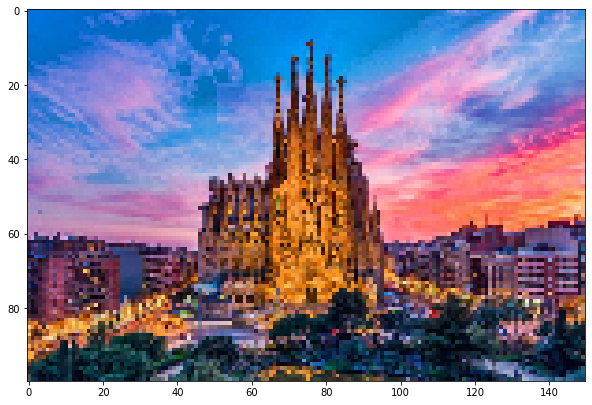

In [3]:
from skimage import io

hr_image = io.imread(image_path)
hr_image = cv2.resize(hr_image, dsize=(150,100))

print(hr_image.shape)

plt.figure(figsize=(10,20))
plt.imshow(hr_image)

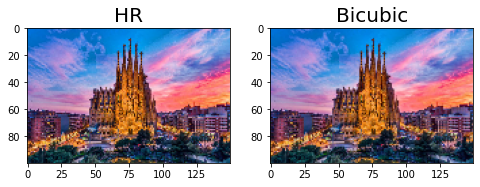

In [4]:
lr_image = cv2.resize(hr_image, dsize=(550, 702))
bicubic_image = cv2.resize(lr_image, dsize=(hr_image.shape[1], hr_image.shape[0]), interpolation=cv2.INTER_CUBIC)

images = [hr_image, bicubic_image]
titles = ['HR', 'Bicubic']

plt.figure(figsize=(8, 16))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 2, i+1)
    plt.imshow(image)
    plt.title(title, fontsize=20)

In [5]:
model_file = os.getenv('HOME')+'/aiffel/exploration_1/SRGAN/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [6]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_hr = apply_srgan(lr_image)

### 1-2

1. (적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.

2. 불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.

3. 1.에서 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. cv2.resize()를 사용해 봅시다.

4. 2개 이미지(3.의 Bicubic의 결과, 2.의 SRGAN의 결과)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.

5. 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

### 프로젝트 2: SRGAN을 이용해 고해상도 gif 생성하기